In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../../data/processed/undersampling_no_similar_data.csv')

print(df.shape)
df.head()

(8585, 24)


,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,...,country,state,city,combined_text,industry_grouped,function_grouped,country_grouped,state_grouped,city_grouped,cleaned_text
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,No benefits listed,0,1,0,Other,Internship,...,US,NY,New York,"Marketing Intern We're Food52, and we've creat...",Unknown,Marketing,US,NY,New York,"Marketing Intern We're Food52, and we've creat..."
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,...,NZ,Unknown,Auckland,Customer Service - Cloud Video Production 90 S...,Marketing and Advertising,Customer Service,NZ,Unknown,Auckland,Customer Service - Cloud Video Production 90 S...
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,No benefits listed,0,1,0,Unknown,Unknown,...,US,IA,Wever,Commissioning Machinery Assistant (CMA) Valor ...,Unknown,Unknown,US,IA,Other,Commissioning Machinery Assistant (CMA) Valor ...
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,...,US,DC,Washington,Account Executive - Washington DC Our passion ...,Computer Software,Sales,US,DC,Washington,Account Executive - Washington DC Our passion ...
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,...,US,FL,Fort Worth,Bill Review Manager SpotSource Solutions LLC i...,Hospital & Health Care,Health Care Provider,US,FL,Fort Worth,Bill Review Manager SpotSource Solutions LLC i...


In [3]:
df.isnull().sum()

title                    0
company_profile          0
description              0
requirements             0
benefits                 0
telecommuting            0
has_company_logo         0
has_questions            0
employment_type          0
required_experience      0
required_education       0
industry                 0
function                 0
fraudulent               0
country                  0
state                    0
city                     0
combined_text            0
industry_grouped         0
function_grouped         0
country_grouped          0
state_grouped            0
city_grouped             0
cleaned_text           855
dtype: int64

In [4]:
df['fraudulent'].value_counts()

fraudulent
0    7730
1     855
Name: count, dtype: int64

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine relevant text columns
df['combined_text'] = (
    df['title'] + ' ' +
    df['company_profile'] + ' ' +
    df['description'] + ' ' +
    df['requirements'] + ' ' +
    df['benefits']
)


In [6]:
import re
from bs4 import BeautifulSoup
import html

def clean_text(text):
    t = BeautifulSoup(text, "html.parser").get_text()
    t = html.unescape(t)
    t = re.sub(r"#URL_[^#]+#", "", t)
    t = re.sub(r"\s+", " ", t).strip()
    
    return t

df['cleaned_text'] = df['combined_text'].map(clean_text)


In [7]:
# Vectorize Using TFIDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_text_tfidf = tfidf.fit_transform(df['cleaned_text'])

In [8]:
df.nunique()

title                  6159
company_profile        1432
description            7885
requirements           6833
benefits               3956
telecommuting             2
has_company_logo          2
has_questions             2
employment_type           6
required_experience       8
required_education       14
industry                132
function                 38
fraudulent                2
country                  78
state                   276
city                   1641
combined_text          8206
industry_grouped         50
function_grouped         30
country_grouped          23
state_grouped           122
city_grouped            232
cleaned_text           8174
dtype: int64

In [9]:
df.columns

Index(['title', 'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'country', 'state', 'city', 'combined_text',
       'industry_grouped', 'function_grouped', 'country_grouped',
       'state_grouped', 'city_grouped', 'cleaned_text'],
      dtype='object')

In [10]:
meta_df = df[['telecommuting','has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry_grouped', 'function_grouped', 'country_grouped', 'state_grouped', 'city_grouped', 'fraudulent']]
meta_df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry_grouped,function_grouped,country_grouped,state_grouped,city_grouped,fraudulent
0,0,1,0,Other,Internship,Unknown,Unknown,Marketing,US,NY,New York,0
1,0,1,0,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,NZ,Unknown,Auckland,0
2,0,1,0,Unknown,Unknown,Unknown,Unknown,Unknown,US,IA,Other,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,US,DC,Washington,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,US,FL,Fort Worth,0


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Custom order for ordinal features
experience_order = [
    'Internship',
    'Entry level',
    'Associate',
    'Mid-Senior level',
    'Director',
    'Executive',
    'Not Applicable',
    'Unknown'
]

education_order = [
    'Some High School Coursework',
    'High School or equivalent',
    'Vocational - HS Diploma',
    'Some College Coursework Completed',
    'Associate Degree',
    'Vocational',
    'Vocational - Degree',
    'Certification',
    "Bachelor's Degree",
    "Master's Degree",
    'Professional',
    'Doctorate',
    'Unspecified',
    'Unknown'
]

preprocessor = ColumnTransformer(
    transformers=[
        # Ordinal encoding for ordered columns
        ('ord', OrdinalEncoder(categories=[experience_order, education_order]), 
         ['required_experience', 'required_education']),
        
        # One-hot encoding for nominal columns
        ('ohe', OneHotEncoder(handle_unknown='ignore'),
         ['employment_type','industry_grouped','function_grouped', 'country_grouped', 'state_grouped', 'city_grouped'])
    ],
    remainder='passthrough'  # Keep other features 
)


In [12]:
data = meta_df.drop('fraudulent', axis=1)

y = meta_df['fraudulent']
X_meta = preprocessor.fit_transform(data)



In [13]:
from scipy.sparse import hstack

#tfidf
X_final = hstack([X_text_tfidf, X_meta])

In [14]:
X_final.shape

(8585, 5468)

### Modelling

In [19]:
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
# model with tfidf

clf_xgb = XGBClassifier(scale_pos_weight=7730/855)
clf_xgb.fit(X_train, y_train)

y_pred = clf_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1546
           1       0.92      0.88      0.90       171

    accuracy                           0.98      1717
   macro avg       0.95      0.93      0.94      1717
weighted avg       0.98      0.98      0.98      1717



Text(0.5, 1.0, 'Confusion Matrix: Best Model (XGBoost + TF-IDF)')

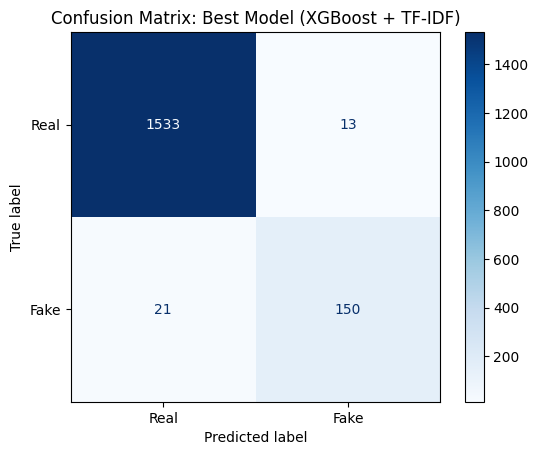

In [20]:
# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"])
disp.plot(cmap="Blues", values_format='d')
disp.ax_.set_title("Confusion Matrix: Best Model (XGBoost + TF-IDF)")

**The best performance achieved with XGBoost and TFIDF**